### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns',500)

In [2]:
tweets_df = pd.read_csv('vaccine_tweets.csv')

In [3]:
tweets_df.head(2) 

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1386122456713228288,1386122456713228288,2021-04-25 06:28:41 India Standard Time,2021-04-25,06:28:41,530,1373531468744552448,vaxhunterscan,Vaccine Hunters Canada,NaN,We had an issue where twitter seemed to have m...,en,"[{'screen_name': 'twittercanada', 'name': 'twi...",[],[],46,127,1704,[],[],https://twitter.com/VaxHuntersCan/status/13861...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1386111987608821763,1386111987608821763,2021-04-25 05:47:05 India Standard Time,2021-04-25,05:47:05,530,166985027,naheedd,Naheed Dosani,NaN,Can someone nominate the team @VaxHuntersCan f...,en,"[{'screen_name': 'vaxhunterscan', 'name': 'vac...",[],[],10,161,1325,['covid19'],[],https://twitter.com/NaheedD/status/13861119876...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
tweets_df.shape

(24744, 36)

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 36 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
place              3 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
qu

In [6]:
tweets_df.nunique()

id                 24744
conversation_id    23858
created_at         24621
date                 924
time               20916
timezone               1
user_id             9871
username            9871
name                9754
place                  3
tweet              24707
language              26
mentions            1352
urls                2742
photos              3702
replies_count       2285
retweets_count      5218
likes_count        10860
hashtags            1339
cashtags               6
link               24744
retweet                1
quote_url           1913
video                  2
thumbnail           4943
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to             567
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

#### Initial Observation
- Total tweets Successfully collected 24744 Tweets
- Total number of rows to be worked on 24744
- 10 columns with all null value
- 3 column with more than 80% null values


### Checking for nytimes / cnn / usnews value counts

In [7]:
df_nytimestweets = tweets_df[tweets_df['username'] == 'nytimes']
df_nytimestweets['username'].value_counts()

nytimes    83
Name: username, dtype: int64

####  most popular tweeter news account CNN Breaking News (60.2m followers) has only 47 tweets regarding Vaccine

In [8]:
df_cnntweets = tweets_df[tweets_df['username'] == 'cnnbrk']
df_cnntweets['username'].value_counts()

cnnbrk    48
Name: username, dtype: int64

In [9]:
df_usnewstweets = tweets_df[tweets_df['username'] == 'usnews']
df_usnewstweets['username'].value_counts() 

Series([], Name: username, dtype: int64)

### Dropping columns with more than 60% null value

In [10]:
tweets_df = tweets_df.loc[:, tweets_df.isnull().mean() < .6]

#### Checking for users with number of tweets

In [11]:
tweets_df['username'].value_counts()

kylegriffin1      194
spectatorindex    188
drericding        152
aslavitt          136
ani               116
                 ... 
healthinsider       1
monicagandhi9       1
lesarenee333        1
jamescowiee         1
marioandretti       1
Name: username, Length: 9871, dtype: int64

#### number of languages tweets

In [12]:
tweets_df['language'].value_counts()

en     24061
tl       149
fr       128
hi        94
ja        70
in        52
und       46
pt        44
es        29
it        23
cs        12
de         6
ht         5
ca         5
ro         4
et         3
da         3
tr         2
fi         1
nl         1
mr         1
ur         1
ar         1
fa         1
lt         1
th         1
Name: language, dtype: int64

In [13]:
tweets_df['cashtags'].value_counts()

[]                                       24739
['zm']                                       1
['pfe']                                      1
['pfe', 'mrna', 'nvax', 'azn', 'jnj']        1
['pfe', 'mrna']                              1
['mrna']                                     1
Name: cashtags, dtype: int64

In [14]:
tweets_df['video'].value_counts() 

0    19720
1     5024
Name: video, dtype: int64

In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 23 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
video              24744 non-null int64

### Checking dates and converting it into datetime

In [16]:
tweets_df['date'].min()

'2013-02-17'

In [17]:
tweets_df['date'].max()

'2021-04-25'

In [18]:
tweets_df['date']= pd.to_datetime(tweets_df['date']) 

In [19]:
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

In [20]:
tweets_df['year'].value_counts() 

2021    14179
2020     9728
2019      541
2018      184
2017       69
2015       18
2016       14
2014        9
2013        2
Name: year, dtype: int64

#### Catplot for number of tweets based on month and year

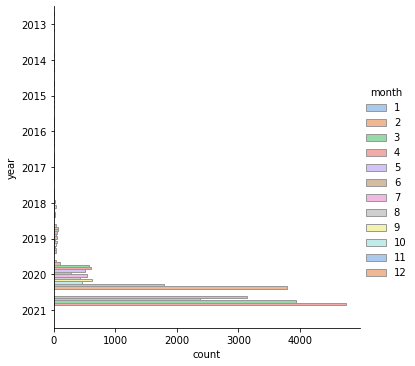

In [21]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df)

#### Observation
- Most of the tweets are from 2020 onwards so we can make the assumption , the talk of vaccine became more popular since COVID19 started

#### Selecting tweets after 1/1/2020

In [22]:
ts = pd.to_datetime('1/1/2020')
tweets_df_r = tweets_df.loc[tweets_df.date >= ts,: ] 

In [23]:
tweets_df_r.shape

(23907, 25)

In [24]:
tweets_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23907 entries, 0 to 23906
Data columns (total 25 columns):
id                 23907 non-null int64
conversation_id    23907 non-null int64
created_at         23907 non-null object
date               23907 non-null datetime64[ns]
time               23907 non-null object
timezone           23907 non-null int64
user_id            23907 non-null int64
username           23907 non-null object
name               23907 non-null object
tweet              23907 non-null object
language           23907 non-null object
mentions           23907 non-null object
urls               23907 non-null object
photos             23907 non-null object
replies_count      23907 non-null int64
retweets_count     23907 non-null int64
likes_count        23907 non-null int64
hashtags           23907 non-null object
cashtags           23907 non-null object
link               23907 non-null object
retweet            23907 non-null bool
video              23907 non-nu

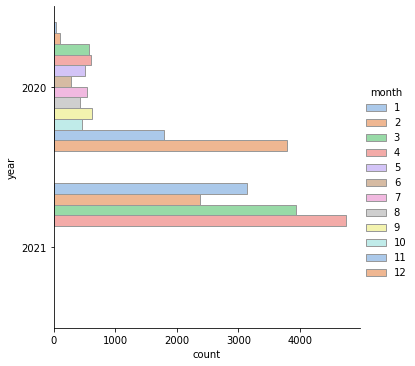

In [25]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df_r)

In [26]:
tweets_df_r.groupby(['year','month']).size().unstack(fill_value=0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,42,109,579,600,503,280,540,432,619,456,1787,3781
2021,3135,2370,3931,4743,0,0,0,0,0,0,0,0


#### Observation
- Clearly the number of tweets with regards to vaccine has been the highest in 25 days of April 2021

### Creating a subset and working on it

In [27]:
subset = ['date', 'tweet', 'month','year']
tweets_df_r1 = tweets_df_r.loc[:, subset] 
tweets_df_r1.head() 

,date,tweet,month,year
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021


In [28]:
tweets_df_r1.shape

(23907, 4)

### Checking the word frequency

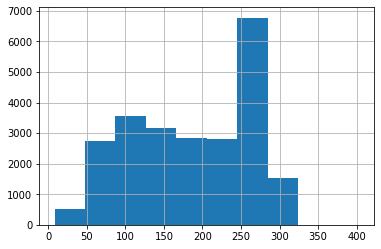

In [29]:
tweets_df_r1['tweet'].str.len().hist() 

#### Observation
- The histogram shows that the tweets range from **5 to 320 characters** and generally, it is between **50 to 250 characters.**

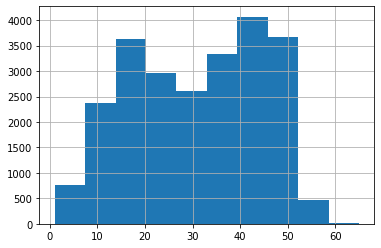

In [30]:
tweets_df_r1['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist() 

#### Observation
The histogram shows that the tweets at the **number of word level** range from 1 to 58 words and generally, it is between 10 to 50 words.

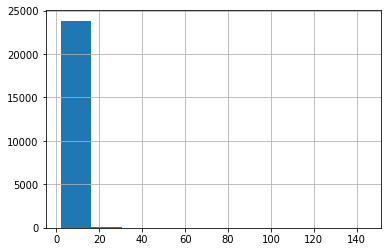

In [31]:
tweets_df_r1['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### Observation
The histogram shows **Average number of word** us 2-18

### NLTK

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Adding Tokenized column

In [33]:
tweets_df_r1['tt'] = tweets_df_r1['tweet'].apply(word_tokenize)

In [34]:
tweets_df_r1.head()

,date,tweet,month,year,tt
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t..."
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt..."
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g..."
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad..."
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,..."


### Adding sentiment through TextBlob
- **Polarity** is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
- **Subjectivity** is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [35]:
from textblob import TextBlob

In [36]:
def clean_tweet(tweets_df_r1, tt):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [37]:
def sentiment_calc(tt):
    try:
        return TextBlob(tt).sentiment
    except:
        return None
    
tweets_df_r1['sentiment'] = tweets_df_r1['tweet'].apply(sentiment_calc)

In [38]:
tweets_df_r2 = tweets_df_r1
sentiment_series = tweets_df_r2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
tweets_df_r2 = pd.DataFrame(sentiment_series, columns=columns, index=tweets_df_r2.index)

In [39]:
tweets_df_r2.head()

,polarity,subjectivity
0,0.200000,0.243750
1,0.266667,0.308333
2,-0.159375,0.687500
3,0.218750,0.343750
4,0.056250,0.258333


In [40]:
tweets_df_r2.shape

(23907, 2)

In [41]:
tweets_df_r1['polarity'] = tweets_df_r2['polarity']
tweets_df_r1['subjectivity'] = tweets_df_r2['subjectivity'] 

In [42]:
tweets_df_r1.head() 

,date,tweet,month,year,tt,sentiment,polarity,subjectivity
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333


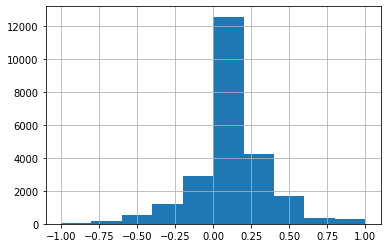

In [43]:
tweets_df_r1['polarity'].hist() 

#### Stop words and Corpus

In [45]:
stop=set(stopwords.words('english'))

corpus=[]
newtt= tweets_df_r1['tweet'].str.split()
newtt=newtt.values.tolist()
corpus=[word for i in newtt for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

#### Plotting the top 10 stopwords & non stopwords

In [48]:
def plot_top_stopwords_barchart(tweet):
    stop=set(stopwords.words('english'))
    
    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

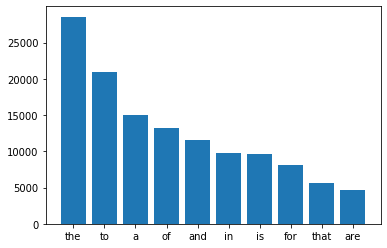

In [49]:
plot_top_stopwords_barchart(tweets_df_r1['tweet']) 

#### Word level Analysis on through counter function
- A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

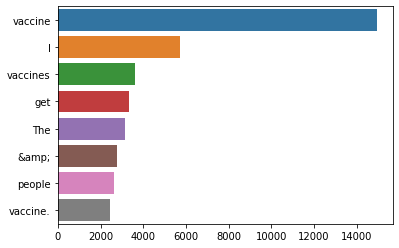

In [52]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [53]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

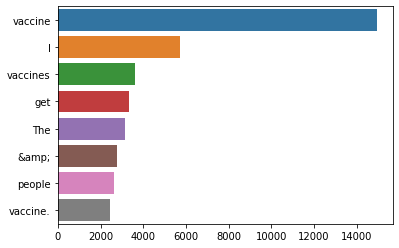

In [54]:
plot_top_non_stopwords_barchart(tweets_df_r1['tweet'])

### Ngram exploration

In [55]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [58]:
def plot_top_ngrams_barchart(tweet, n=2):
    stop=set(stopwords.words('english'))

    newtt= tweets_df_r1['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(tweet,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

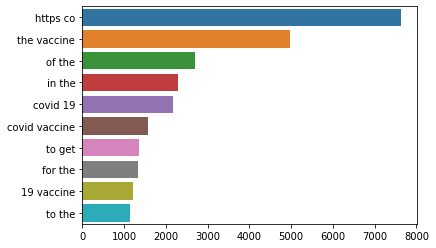

In [59]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],2)

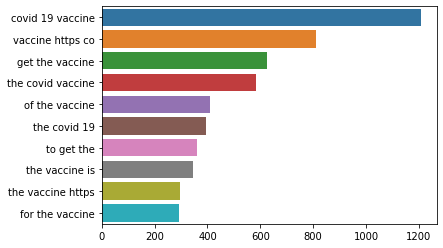

In [60]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],3) 

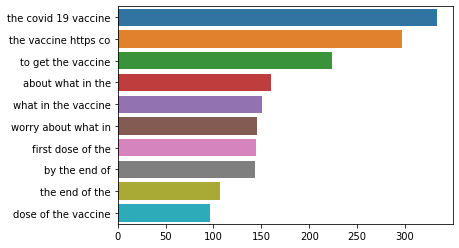

In [61]:
plot_top_ngrams_barchart(tweets_df_r1['tweet'],4)  